In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

[[148. 121. 140.]
 [122. 109. 135.]
 [213. 189. 211.]
 [ 84.  86. 135.]
 [ 96.  99. 118.]]


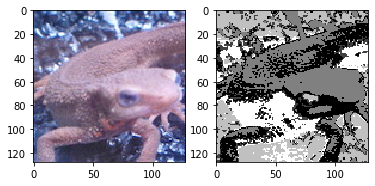

In [7]:
#91
def kmeans_dec(_img, clss=5):
    np.random.seed(0)
    h, w, c = _img.shape
    img = _img.reshape((h*w, c)).astype(np.float32)
    
    idx = np.random.choice(np.arange(h*w), clss, replace=False)
    rand = img[idx].copy()                   
    
    print(rand)
    
    out = np.zeros((h, w), dtype=np.int)
    for i in range(h):
        for j in range(w):
            m = 9999
            for k, arr in enumerate(rand):
                dis = np.sqrt(np.sum((img[i*h+j] - arr)**2))
                if dis < m:
                    m = dis
                    out[i, j] = k
    
    out = out * 50
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

out = kmeans_dec(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

[[148. 121. 140.]
 [122. 109. 135.]
 [213. 189. 211.]
 [ 84.  86. 135.]
 [ 96.  99. 118.]]
[[181.0588   156.3929   182.90549 ]
 [136.67743  124.02829  157.28413 ]
 [211.8062   201.7605   228.36818 ]
 [ 56.786606  57.4926    91.524925]
 [ 96.16177   88.02611  121.739624]]
[[148. 121. 140.]
 [122. 109. 135.]
 [213. 189. 211.]
 [ 84.  86. 135.]
 [ 96.  99. 118.]
 [ 73.  81. 120.]
 [193. 163. 187.]
 [103.  81. 102.]
 [ 53.  52.  68.]
 [112.  97. 126.]]
[[185.26312  155.97252  179.85277 ]
 [139.75497  159.3404   210.40927 ]
 [219.4227   220.13889  244.11716 ]
 [101.93587  116.030876 166.01108 ]
 [123.93599  101.40096  126.190216]
 [ 67.82403   80.91858  130.40906 ]
 [206.05043  182.43265  209.18315 ]
 [ 96.202255  78.36077  103.813736]
 [ 52.298294  52.616478  83.91421 ]
 [159.76305  131.16455  155.3432  ]]


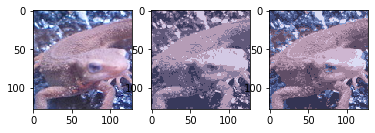

In [24]:
#92
def kmeans_dec(_img, clss=5):
    np.random.seed(0)
    h, w, c = _img.shape
    img = _img.reshape((h*w, c)).astype(np.float32)
    
    idx = np.random.choice(np.arange(h*w), clss, replace=False)
    rand = img[idx].copy()                   
    
    print(rand)
    
    cl = np.zeros((h, w), dtype=np.int)
    
    while True:
        for i in range(h):
            for j in range(w):
                m = 9999
                for k, arr in enumerate(rand):
                    dis = np.sqrt(np.sum((img[i*h+j] - arr)**2))
                    if dis < m:
                        m = dis
                        cl[i, j] = k
        
        tmp = np.zeros((clss, c), dtype=np.float32)
        for i in range(clss):
            tmp[i] = np.mean(_img[cl == i], axis=0)
                
        if (rand == tmp).all():
            break
        else:
            rand = tmp.copy()
    
    print(rand)
    
    out = np.zeros_like(_img)
    for i in range(clss):
        out[cl == i] = rand[i]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

out1 = kmeans_dec(img)
out2 = kmeans_dec(img, clss=10)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(out1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(out2, cmap='gray')
plt.show()

[[235. 239. 250.]
 [ 38.  38.  30.]
 [ 11.   9.  12.]
 [245. 247. 244.]
 [ 31.  27.  24.]]
[[141.97229  150.1792   132.38687 ]
 [100.51996  110.39039   94.05454 ]
 [ 19.549341  19.851242  18.052998]
 [239.79015  237.22185  231.41972 ]
 [ 65.71256   67.198395  58.796318]]


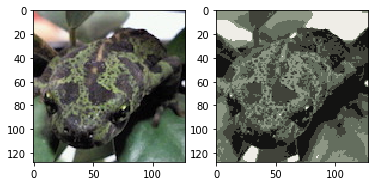

In [25]:
#92
img = cv2.imread('madara.jpg')
img = img[..., ::-1]

out = kmeans_dec(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

In [4]:
#93
def iou(a, b):
    r1 = (a[2] - a[0]) * (a[3] - a[1])
    r2 = (b[2] - b[0]) * (b[3] - b[1])
    
    c1 = max(a[0], b[0])
    c2 = max(a[1], b[1])
    c3 = min(a[2], b[2])
    c4 = min(a[3], b[3])

    if c3 - c1 < 0 or c4 - c2 < 0:
        return 0
    
    rol = (c3 - c1) * (c4 - c2)
    
    return rol / (r1 + r2 - rol)


a = np.array((50, 50, 150, 150), dtype=np.float32)
b = np.array((60, 60, 170, 160), dtype=np.float32)

print(iou(a, b))

0.627907


/Users/keigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


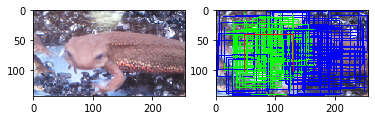

In [15]:
#94
def crop(img, x1, y1, x2, y2, c):
    out = img.copy()
    out[y1:y2, x1:x1+1] = c
    out[y1:y2, x2:x2+1] = c
    out[y1:y1+1, x1:x2] = c
    out[y2:y2+1, x1:x2] = c
    return out


def cropping(img, gt, size=60, n=200, th=0.5):
    np.random.seed(0)
    h, w, c = img.shape
    
    
    for i in range(n):
        x1 = np.random.randint(w-size)
        y1 = np.random.randint(h-size)
        win = np.array((x1, y1, x1+60, y1+60), dtype=np.float32)
        
        val = iou(gt, win)
        
        if val >= th:
            img = crop(img, x1, y1, x1+60, y1+60, [0, 255, 0])
        else:
            img = crop(img, x1, y1, x1+60, y1+60, [0, 0, 255])
        
    return img
    

    
img = cv2.imread('imori_1.jpg')
img = img[..., ::-1]

gt = np.array((47, 41, 129, 103), dtype=np.uint8)
out = img.copy()

out = cropping(img, gt)
out = crop(out, gt[0], gt[1], gt[2], gt[3], [255, 0, 0])

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.show()

In [14]:
#95
import numpy as np

np.random.seed(0)

class NN:
    def __init__(self, ind=2, w1=64, w2=64, outd=1, lr=0.1):
        self.w1 = np.random.normal(0, 1, [ind, w1])
        self.b1 = np.random.normal(0, 1, [w1])
        self.w2 = np.random.normal(0, 1, [w1, w2])
        self.b2 = np.random.normal(0, 1, [w1])
        self.wout = np.random.normal(0, 1, [w2, outd])
        self.bout = np.random.normal(0, 1, [outd])
        self.lr = lr

    def forward(self, x):
        self.z1 = x
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        # backpropagation output layer
        #En = t * np.log(self.out) + (1-t) * np.log(1-self.out)
        En = (self.out - t) * self.out * (1 - self.out)
        grad_En = En #np.array([En for _ in range(t.shape[0])])
        grad_wout = np.dot(self.z2.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        self.wout -= self.lr * grad_wout#np.expand_dims(grad_wout, axis=-1)
        self.bout -= self.lr * grad_bout

        # backpropagation inter layer
        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2
        
        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

train_x = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
train_t = np.array([[0], [1], [1], [0]], dtype=np.float32)

nn = NN(ind=train_x.shape[1])

# train
for i in range(5000):
    nn.forward(train_x)
    nn.train(train_x, train_t)

# test
for j in range(4):
    x = train_x[j]
    t = train_t[j]
    print("in:", x, "pred:", nn.forward(x))


in: [0. 0.] pred: [0.03057522]
in: [0. 1.] pred: [0.96557917]
in: [1. 0.] pred: [0.97167961]
in: [1. 1.] pred: [0.03238713]


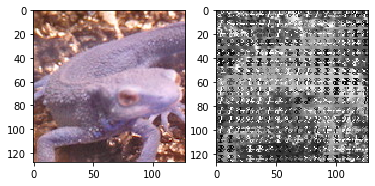

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# draw HOG
def draw_HOG(img, histogram):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    def draw(gray, histogram, N=8):
        # get shape
        H, W = gray.shape
        cell_N_H, cell_N_W, _ = histogram.shape
        
        ## Draw
        out = gray[1 : H + 1, 1 : W + 1].copy().astype(np.uint8)

        for y in range(cell_N_H):
            for x in range(cell_N_W):
                cx = x * N + N // 2
                cy = y * N + N // 2
                x1 = cx + N // 2 - 1
                y1 = cy
                x2 = cx - N // 2 + 1
                y2 = cy
                
                h = histogram[y, x] / np.sum(histogram[y, x])
                h /= h.max()
        
                for c in range(9):
                    #angle = (20 * c + 10 - 90) / 180. * np.pi
                    # get angle
                    angle = (20 * c + 10) / 180. * np.pi
                    rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                    ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                    lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                    ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                    # color is HOG value
                    c = int(255. * h[c])

                    # draw line
                    cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

        return out
    

    # get gray
    gray = BGR2GRAY(img)

    # draw HOG
    out = draw(gray, histogram)

    return out

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# get HOG
histogram = HOG(img)

# draw HOG
out = draw_HOG(img, histogram)

img = img.astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.show()

In [18]:
#96

In [1]:
#97
import cv2
import numpy as np

np.random.seed(0)

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# get IoU overlap ratio
def iou(a, b):
	# get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
	# get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])

	# get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
	# get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
	# get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
	# get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

	# get width of IoU
    iou_w = iou_x2 - iou_x1
	# get height of IoU
    iou_h = iou_y2 - iou_y1

	# get area of IoU
    area_iou = iou_w * iou_h
	# get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)

    return iou

# resize using bi-linear
def resize(img, h, w):
    # get shape
    _h, _w, _c  = img.shape

    # get resize ratio
    ah = 1. * h / _h
    aw = 1. * w / _w

    # get index of each y
    y = np.arange(h).repeat(w).reshape(w, -1)
    # get index of each x
    x = np.tile(np.arange(w), (h, 1))

    # get coordinate toward x and y of resized image
    y = (y / ah)
    x = (x / aw)

    # transfer to int
    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)

    # clip index
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _h-2)

    # get distance between original image index and resized image index
    dx = x - ix
    dy = y - iy

    dx = np.tile(dx, [_c, 1, 1]).transpose(1, 2, 0)
    dy = np.tile(dy, [_c, 1, 1]).transpose(1, 2, 0)
    
    # resize
    out = (1 - dx) * (1 - dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix + 1] + (1 - dx) * dy * img[iy + 1, ix] + dx * dy * img[iy + 1, ix + 1]
    out[out > 255] = 255

    return out

# sliding window
def sliding_window(img, H_size=32):
    # get shape
    H, W, _ = img.shape
    
    # base rectangle [h, w]
    recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32)

    # sliding window
    for y in range(0, H, 4):
        for x in range(0, W, 4):
            for rec in recs:
                # get half size of ractangle
                dh = int(rec[0] // 2)
                dw = int(rec[1] // 2)

                # get left top x
                x1 = max(x - dw, 0)
                # get left top y
                x2 = min(x + dw, W)
                # get right bottom x
                y1 = max(y - dh, 0)
                # get right bottom y
                y2 = min(y + dh, H)

                # crop region
                region = img[max(y - dh, 0) : min(y + dh, H), max(x - dw, 0) : min(x + dw, W)]

                # resize crop region
                region = resize(region, H_size, H_size)

                # get HOG feature
                region_hog = HOG(region).ravel()



# read detect target image
img = cv2.imread("imori_many.jpg")

sliding_window(img)


[[27 0 69 21 array([0.7546601])]
 [31 0 73 21 array([0.87680569])]
 [52 0 108 36 array([0.82032896])]
 [165 0 235 43 array([0.74100872])]
 [165 0 235 47 array([0.92402423])]
 [169 0 239 47 array([0.83154567])]
 [51 0 93 37 array([0.80911178])]
 [168 0 224 44 array([0.80491064])]
 [165 0 235 51 array([0.85510071])]
 [51 0 93 41 array([0.81690587])]
 [168 0 224 56 array([0.87210987])]
 [43 15 85 57 array([0.93844836])]
 [13 37 83 107 array([0.76192558])]
 [180 44 236 100 array([0.80740358])]
 [173 37 243 107 array([0.83087442])]
 [177 37 247 107 array([0.86574235])]
 [24 68 80 124 array([0.73088897])]
 [103 75 145 117 array([0.72603429])]
 [104 68 160 124 array([0.70929595])]
 [96 72 152 128 array([0.8496568])]
 [100 72 156 128 array([0.98407866])]
 [25 69 95 139 array([0.74496782])]
 [104 76 160 132 array([0.95381952])]
 [75 91 117 133 array([0.78204367])]
 [97 77 167 144 array([0.74108936])]]


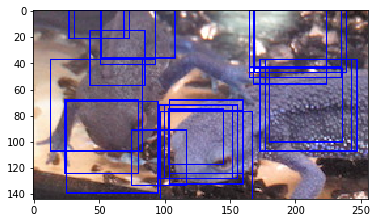

In [5]:
#98
import cv2
import numpy as np

np.random.seed(0)

# read image
img = cv2.imread("imori_1.jpg")
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,255), 1)

def iou(a, b):
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    iou_x1 = np.maximum(a[0], b[0])
    iou_y1 = np.maximum(a[1], b[1])
    iou_x2 = np.minimum(a[2], b[2])
    iou_y2 = np.minimum(a[3], b[3])
    iou_w = max(iou_x2 - iou_x1, 0)
    iou_h = max(iou_y2 - iou_y1, 0)
    area_iou = iou_w * iou_h
    iou = area_iou / (area_a + area_b - area_iou)
    return iou


def hog(gray):
    h, w = gray.shape
    # Magnitude and gradient
    gray = np.pad(gray, (1, 1), 'edge')

    gx = gray[1:h+1, 2:] - gray[1:h+1, :w]
    gy = gray[2:, 1:w+1] - gray[:h, 1:w+1]
    gx[gx == 0] = 0.000001

    mag = np.sqrt(gx ** 2 + gy ** 2)
    gra = np.arctan(gy / gx)
    gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

    # Gradient histogram
    gra_n = np.zeros_like(gra, dtype=np.int)

    d = np.pi / 9
    for i in range(9):
        gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

    N = 8
    HH = h // N
    HW = w // N
    Hist = np.zeros((HH, HW, 9), dtype=np.float32)
    for y in range(HH):
        for x in range(HW):
            for j in range(N):
                for i in range(N):
                    Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]

    ## Normalization
    C = 3
    eps = 1
    for y in range(HH):
        for x in range(HW):
            #for i in range(9):
            Hist[y, x] /= np.sqrt(np.sum(Hist[max(y-1,0):min(y+2, HH), max(x-1,0):min(x+2, HW)] ** 2) + eps)

    return Hist

def resize(img, h, w):
    _h, _w  = img.shape
    ah = 1. * h / _h
    aw = 1. * w / _w
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / ah)
    x = (x / aw)

    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _h-2)

    dx = x - ix
    dy = y - iy

    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out


class NN:
    def __init__(self, ind=2, w=64, w2=64, outd=1, lr=0.1):
        self.w1 = np.random.normal(0, 1, [ind, w])
        self.b1 = np.random.normal(0, 1, [w])
        self.w2 = np.random.normal(0, 1, [w, w2])
        self.b2 = np.random.normal(0, 1, [w2])
        self.wout = np.random.normal(0, 1, [w2, outd])
        self.bout = np.random.normal(0, 1, [outd])
        self.lr = lr

    def forward(self, x):
        self.z1 = x
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        # backpropagation output layer
        #En = t * np.log(self.out) + (1-t) * np.log(1-self.out)
        En = (self.out - t) * self.out * (1 - self.out)
        grad_wout = np.dot(self.z3.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        self.wout -= self.lr * grad_wout
        self.bout -= self.lr * grad_bout

        # backpropagation inter layer
        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2

        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

# crop and create database

Crop_num = 200
L = 60
H_size = 32
F_n = ((H_size // 8) ** 2) * 9

db = np.zeros((Crop_num, F_n+1))

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1, y1, x2, y2))

    _iou = iou(gt, crop)

    if _iou >= 0.5:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
        label = 1
    else:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
        label = 0

    crop_area = gray[y1:y2, x1:x2]
    crop_area = resize(crop_area, H_size, H_size)
    _hog = hog(crop_area)

    db[i, :F_n] = _hog.ravel()
    db[i, -1] = label

## train neural network
nn = NN(ind=F_n, lr=0.01)
for i in range(10000):
    nn.forward(db[:, :F_n])
    nn.train(db[:, :F_n], db[:, -1][..., None])


# read detect target image
img2 = cv2.imread("imori_many.jpg")
H2, W2, C2 = img2.shape

# Grayscale
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

# [h, w]
recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32)

detects = np.ndarray((0, 5), dtype=np.float32)

# sliding window
for y in range(0, H2, 4):
    for x in range(0, W2, 4):
        for rec in recs:
            dh = int(rec[0] // 2)
            dw = int(rec[1] // 2)
            x1 = max(x-dw, 0)
            x2 = min(x+dw, W2)
            y1 = max(y-dh, 0)
            y2 = min(y+dh, H2)
            region = gray2[max(y-dh,0):min(y+dh,H2), max(x-dw,0):min(x+dw,W2)]
            region = resize(region, H_size, H_size)
            region_hog = hog(region).ravel()

            score = nn.forward(region_hog)
            if score >= 0.7:
                cv2.rectangle(img2, (x1, y1), (x2, y2), (0,0,255), 1)
                detects = np.vstack((detects, np.array((x1, y1, x2, y2, score))))

print(detects)

plt.imshow(img2)
plt.show()

In [7]:
#99
import cv2
import numpy as np

np.random.seed(0)

# read image
img = cv2.imread("imori_1.jpg")
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,255), 1)

def iou(a, b):
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    iou_x1 = np.maximum(a[0], b[0])
    iou_y1 = np.maximum(a[1], b[1])
    iou_x2 = np.minimum(a[2], b[2])
    iou_y2 = np.minimum(a[3], b[3])
    iou_w = max(iou_x2 - iou_x1, 0)
    iou_h = max(iou_y2 - iou_y1, 0)
    area_iou = iou_w * iou_h
    iou = area_iou / (area_a + area_b - area_iou)
    return iou


def hog(gray):
    h, w = gray.shape
    # Magnitude and gradient
    gray = np.pad(gray, (1, 1), 'edge')

    gx = gray[1:h+1, 2:] - gray[1:h+1, :w]
    gy = gray[2:, 1:w+1] - gray[:h, 1:w+1]
    gx[gx == 0] = 0.000001

    mag = np.sqrt(gx ** 2 + gy ** 2)
    gra = np.arctan(gy / gx)
    gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

    # Gradient histogram
    gra_n = np.zeros_like(gra, dtype=np.int)

    d = np.pi / 9
    for i in range(9):
        gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

    N = 8
    HH = h // N
    HW = w // N
    Hist = np.zeros((HH, HW, 9), dtype=np.float32)
    for y in range(HH):
        for x in range(HW):
            for j in range(N):
                for i in range(N):
                    Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]
                
    ## Normalization
    C = 3
    eps = 1
    for y in range(HH):
        for x in range(HW):
            #for i in range(9):
            Hist[y, x] /= np.sqrt(np.sum(Hist[max(y-1,0):min(y+2, HH), max(x-1,0):min(x+2, HW)] ** 2) + eps)

    return Hist

def resize(img, h, w):
    _h, _w  = img.shape
    ah = 1. * h / _h
    aw = 1. * w / _w
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / ah)
    x = (x / aw)

    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _h-2)

    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out




# crop and create database

Crop_num = 200
L = 60
H_size = 32
F_n = ((H_size // 8) ** 2) * 9

db = np.zeros((Crop_num, F_n+1))

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1, y1, x2, y2))

    _iou = iou(gt, crop)

    if _iou >= 0.5:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
        label = 1
    else:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
        label = 0

    crop_area = gray[y1:y2, x1:x2]
    crop_area = resize(crop_area, H_size, H_size)
    _hog = hog(crop_area)
    
    db[i, :F_n] = _hog.ravel()
    db[i, -1] = label


class NN:
    def __init__(self, ind=2, w=64, w2=64, outd=1, lr=0.1):
        self.w1 = np.random.normal(0, 1, [ind, w])
        self.b1 = np.random.normal(0, 1, [w])
        self.w2 = np.random.normal(0, 1, [w, w2])
        self.b2 = np.random.normal(0, 1, [w2])
        self.wout = np.random.normal(0, 1, [w2, outd])
        self.bout = np.random.normal(0, 1, [outd])
        self.lr = lr

    def forward(self, x):
        self.z1 = x
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        # backpropagation output layer
        #En = t * np.log(self.out) + (1-t) * np.log(1-self.out)
        En = (self.out - t) * self.out * (1 - self.out)
        grad_wout = np.dot(self.z3.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        self.wout -= self.lr * grad_wout
        self.bout -= self.lr * grad_bout

        # backpropagation inter layer
        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2
        
        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

def sigmoid(x):
    return 1. / (1. + np.exp(-x))
    

## training neural network
nn = NN(ind=F_n, lr=0.01)
for i in range(10000):
    nn.forward(db[:, :F_n])
    nn.train(db[:, :F_n], db[:, -1][..., None])


# read detect target image
img2 = cv2.imread("imori_many.jpg")
H2, W2, C2 = img2.shape

# Grayscale
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

# [h, w]
recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32)

detects = np.ndarray((0, 5), dtype=np.float32)

# sliding window
for y in range(0, H2, 4):
    for x in range(0, W2, 4):
        for rec in recs:
            dh = int(rec[0] // 2)
            dw = int(rec[1] // 2)
            x1 = max(x-dw, 0)
            x2 = min(x+dw, W2)
            y1 = max(y-dh, 0)
            y2 = min(y+dh, H2)
            region = gray2[max(y-dh,0):min(y+dh,H2), max(x-dw,0):min(x+dw,W2)]
            region = resize(region, H_size, H_size)
            region_hog = hog(region).ravel()

            score = nn.forward(region_hog)
            if score >= 0.7:
                #cv2.rectangle(img2, (x1, y1), (x2, y2), (0,0,255), 1)
                detects = np.vstack((detects, np.array((x1, y1, x2, y2, score))))


# Non-maximum suppression
def nms(_bboxes, iou_th=0.5, select_num=None, prob_th=None):
    #
    # Non Maximum Suppression
    #
    # Argument
    #  bboxes(Nx5) ... [bbox-num, 5(leftTopX,leftTopY,w,h, score)]
    #  iou_th([float]) ... threshold for iou between bboxes.
    #  select_num([int]) ... max number for choice bboxes. If None, this is unvalid.
    #  prob_th([float]) ... probability threshold to choice. If None, this is unvalid.
    # Return
    #  inds ... choced indices for bboxes
    #

    bboxes = _bboxes.copy()
    
    bboxes[:, 2] = bboxes[:, 2] - bboxes[:, 0]
    bboxes[:, 3] = bboxes[:, 3] - bboxes[:, 1]
    
    # Sort by bbox's score. High -> Low
    sort_inds = np.argsort(bboxes[:, -1])[::-1]

    processed_bbox_ind = []
    return_inds = []

    unselected_inds = sort_inds.copy()
    
    while len(unselected_inds) > 0:
        process_bboxes = bboxes[unselected_inds]
        argmax_score_ind = np.argmax(process_bboxes[::, -1])
        max_score_ind = unselected_inds[argmax_score_ind]
        return_inds += [max_score_ind]
        unselected_inds = np.delete(unselected_inds, argmax_score_ind)

        base_bbox = bboxes[max_score_ind]
        compare_bboxes = bboxes[unselected_inds]
        
        base_x1 = base_bbox[0]
        base_y1 = base_bbox[1]
        base_x2 = base_bbox[2] + base_x1
        base_y2 = base_bbox[3] + base_y1
        base_w = np.maximum(base_bbox[2], 0)
        base_h = np.maximum(base_bbox[3], 0)
        base_area = base_w * base_h

        # compute iou-area between base bbox and other bboxes
        iou_x1 = np.maximum(base_x1, compare_bboxes[:, 0])
        iou_y1 = np.maximum(base_y1, compare_bboxes[:, 1])
        iou_x2 = np.minimum(base_x2, compare_bboxes[:, 2] + compare_bboxes[:, 0])
        iou_y2 = np.minimum(base_y2, compare_bboxes[:, 3] + compare_bboxes[:, 1])
        iou_w = np.maximum(iou_x2 - iou_x1, 0)
        iou_h = np.maximum(iou_y2 - iou_y1, 0)
        iou_area = iou_w * iou_h

        compare_w = np.maximum(compare_bboxes[:, 2], 0)
        compare_h = np.maximum(compare_bboxes[:, 3], 0)
        compare_area = compare_w * compare_h

        # bbox's index which iou ratio over threshold is excluded
        all_area = compare_area + base_area - iou_area
        iou_ratio = np.zeros((len(unselected_inds)))
        iou_ratio[all_area < 0.9] = 0.
        _ind = all_area >= 0.9
        iou_ratio[_ind] = iou_area[_ind] / all_area[_ind]
        
        unselected_inds = np.delete(unselected_inds, np.where(iou_ratio >= iou_th)[0])

    if prob_th is not None:
        preds = bboxes[return_inds][:, -1]
        return_inds = np.array(return_inds)[np.where(preds >= prob_th)[0]].tolist()
        
    # pick bbox's index by defined number with higher score
    if select_num is not None:
        return_inds = return_inds[:select_num]

    return return_inds


detects = detects[nms(detects, iou_th=0.25)]

for d in detects:
    v = list(map(int, d[:4]))
    cv2.rectangle(img2, (v[0], v[1]), (v[2], v[3]), (0,0,255), 1)
    cv2.putText(img2, "{:.2f}".format(d[-1]), (v[0], v[1]+9),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,0,255), 1)

cv2.imwrite("out.jpg", img2)
cv2.imshow("result", img2)
cv2.waitKey(0)

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [8]:
#100
import cv2
import numpy as np

np.random.seed(0)

# read image
img = cv2.imread("imori_1.jpg")
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,255), 1)

def iou(a, b):
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    iou_x1 = np.maximum(a[0], b[0])
    iou_y1 = np.maximum(a[1], b[1])
    iou_x2 = np.minimum(a[2], b[2])
    iou_y2 = np.minimum(a[3], b[3])
    iou_w = max(iou_x2 - iou_x1, 0)
    iou_h = max(iou_y2 - iou_y1, 0)
    area_iou = iou_w * iou_h
    iou = area_iou / (area_a + area_b - area_iou)
    return iou


def hog(gray):
    h, w = gray.shape
    # Magnitude and gradient
    gray = np.pad(gray, (1, 1), 'edge')

    gx = gray[1:h+1, 2:] - gray[1:h+1, :w]
    gy = gray[2:, 1:w+1] - gray[:h, 1:w+1]
    gx[gx == 0] = 0.000001

    mag = np.sqrt(gx ** 2 + gy ** 2)
    gra = np.arctan(gy / gx)
    gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

    # Gradient histogram
    gra_n = np.zeros_like(gra, dtype=np.int)

    d = np.pi / 9
    for i in range(9):
        gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

    N = 8
    HH = h // N
    HW = w // N
    Hist = np.zeros((HH, HW, 9), dtype=np.float32)
    for y in range(HH):
        for x in range(HW):
            for j in range(N):
                for i in range(N):
                    Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]
                
    ## Normalization
    C = 3
    eps = 1
    for y in range(HH):
        for x in range(HW):
            #for i in range(9):
            Hist[y, x] /= np.sqrt(np.sum(Hist[max(y-1,0):min(y+2, HH), max(x-1,0):min(x+2, HW)] ** 2) + eps)

    return Hist

def resize(img, h, w):
    _h, _w  = img.shape
    ah = 1. * h / _h
    aw = 1. * w / _w
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / ah)
    x = (x / aw)

    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _h-2)

    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out


class NN:
    def __init__(self, ind=2, w=64, w2=64, outd=1, lr=0.1):
        self.w1 = np.random.normal(0, 1, [ind, w])
        self.b1 = np.random.normal(0, 1, [w])
        self.w2 = np.random.normal(0, 1, [w, w2])
        self.b2 = np.random.normal(0, 1, [w2])
        self.wout = np.random.normal(0, 1, [w2, outd])
        self.bout = np.random.normal(0, 1, [outd])
        self.lr = lr

    def forward(self, x):
        self.z1 = x
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        # backpropagation output layer
        #En = t * np.log(self.out) + (1-t) * np.log(1-self.out)
        En = (self.out - t) * self.out * (1 - self.out)
        grad_wout = np.dot(self.z3.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        self.wout -= self.lr * grad_wout
        self.bout -= self.lr * grad_bout

        # backpropagation inter layer
        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2
        
        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

def sigmoid(x):
    return 1. / (1. + np.exp(-x))


# crop and create database

Crop_num = 200
L = 60
H_size = 32
F_n = ((H_size // 8) ** 2) * 9

db = np.zeros((Crop_num, F_n+1))

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1, y1, x2, y2))

    _iou = iou(gt, crop)

    if _iou >= 0.5:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
        label = 1
    else:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
        label = 0

    crop_area = gray[y1:y2, x1:x2]
    crop_area = resize(crop_area, H_size, H_size)
    _hog = hog(crop_area)
    
    db[i, :F_n] = _hog.ravel()
    db[i, -1] = label


## training neural network
nn = NN(ind=F_n, lr=0.01)
for i in range(10000):
    nn.forward(db[:, :F_n])
    nn.train(db[:, :F_n], db[:, -1][..., None])


# read detect target image
img2 = cv2.imread("imori_many.jpg")
H2, W2, C2 = img2.shape

# Grayscale
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

# [h, w]
recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32)

detects = np.ndarray((0, 5), dtype=np.float32)

# sliding window
for y in range(0, H2, 4):
    for x in range(0, W2, 4):
        for rec in recs:
            dh = int(rec[0] // 2)
            dw = int(rec[1] // 2)
            x1 = max(x-dw, 0)
            x2 = min(x+dw, W2)
            y1 = max(y-dh, 0)
            y2 = min(y+dh, H2)
            region = gray2[max(y-dh,0):min(y+dh,H2), max(x-dw,0):min(x+dw,W2)]
            region = resize(region, H_size, H_size)
            region_hog = hog(region).ravel()

            score = nn.forward(region_hog)
            if score >= 0.7:
                #cv2.rectangle(img2, (x1, y1), (x2, y2), (0,0,255), 1)
                detects = np.vstack((detects, np.array((x1, y1, x2, y2, score))))


# Non-maximum suppression
def nms(_bboxes, iou_th=0.5, select_num=None, prob_th=None):
    #
    # Non Maximum Suppression
    #
    # Argument
    #  bboxes(Nx5) ... [bbox-num, 5(leftTopX,leftTopY,w,h, score)]
    #  iou_th([float]) ... threshold for iou between bboxes.
    #  select_num([int]) ... max number for choice bboxes. If None, this is unvalid.
    #  prob_th([float]) ... probability threshold to choice. If None, this is unvalid.
    # Return
    #  inds ... choced indices for bboxes
    #

    bboxes = _bboxes.copy()
    
    bboxes[:, 2] = bboxes[:, 2] - bboxes[:, 0]
    bboxes[:, 3] = bboxes[:, 3] - bboxes[:, 1]
    
    # Sort by bbox's score. High -> Low
    sort_inds = np.argsort(bboxes[:, -1])[::-1]

    processed_bbox_ind = []
    return_inds = []

    unselected_inds = sort_inds.copy()
    
    while len(unselected_inds) > 0:
        process_bboxes = bboxes[unselected_inds]
        argmax_score_ind = np.argmax(process_bboxes[::, -1])
        max_score_ind = unselected_inds[argmax_score_ind]
        return_inds += [max_score_ind]
        unselected_inds = np.delete(unselected_inds, argmax_score_ind)

        base_bbox = bboxes[max_score_ind]
        compare_bboxes = bboxes[unselected_inds]
        
        base_x1 = base_bbox[0]
        base_y1 = base_bbox[1]
        base_x2 = base_bbox[2] + base_x1
        base_y2 = base_bbox[3] + base_y1
        base_w = np.maximum(base_bbox[2], 0)
        base_h = np.maximum(base_bbox[3], 0)
        base_area = base_w * base_h

        # compute iou-area between base bbox and other bboxes
        iou_x1 = np.maximum(base_x1, compare_bboxes[:, 0])
        iou_y1 = np.maximum(base_y1, compare_bboxes[:, 1])
        iou_x2 = np.minimum(base_x2, compare_bboxes[:, 2] + compare_bboxes[:, 0])
        iou_y2 = np.minimum(base_y2, compare_bboxes[:, 3] + compare_bboxes[:, 1])
        iou_w = np.maximum(iou_x2 - iou_x1, 0)
        iou_h = np.maximum(iou_y2 - iou_y1, 0)
        iou_area = iou_w * iou_h

        compare_w = np.maximum(compare_bboxes[:, 2], 0)
        compare_h = np.maximum(compare_bboxes[:, 3], 0)
        compare_area = compare_w * compare_h

        # bbox's index which iou ratio over threshold is excluded
        all_area = compare_area + base_area - iou_area
        iou_ratio = np.zeros((len(unselected_inds)))
        iou_ratio[all_area < 0.9] = 0.
        _ind = all_area >= 0.9
        iou_ratio[_ind] = iou_area[_ind] / all_area[_ind]
        
        unselected_inds = np.delete(unselected_inds, np.where(iou_ratio >= iou_th)[0])

    if prob_th is not None:
        preds = bboxes[return_inds][:, -1]
        return_inds = np.array(return_inds)[np.where(preds >= prob_th)[0]].tolist()
        
    # pick bbox's index by defined number with higher score
    if select_num is not None:
        return_inds = return_inds[:select_num]

    return return_inds


detects = detects[nms(detects, iou_th=0.25)]


# Evaluation

# [x1, y1, x2, y2]
GT = np.array(((27, 48, 95, 110), (101, 75, 171, 138)), dtype=np.float32)

## Recall, Precision, F-score
iou_th = 0.5

Rs = np.zeros((len(GT)))
Ps = np.zeros((len(detects)))

for i, g in enumerate(GT):
    iou_x1 = np.maximum(g[0], detects[:, 0])
    iou_y1 = np.maximum(g[1], detects[:, 1])
    iou_x2 = np.minimum(g[2], detects[:, 2])
    iou_y2 = np.minimum(g[3], detects[:, 3])
    iou_w = np.maximum(0, iou_x2 - iou_x1)
    iou_h = np.maximum(0, iou_y2 - iou_y1)
    iou_area = iou_w * iou_h
    g_area = (g[2] - g[0]) * (g[3] - g[1])
    d_area = (detects[:, 2] - detects[:, 0]) * (detects[:, 3] - detects[:, 1])
    ious = iou_area / (g_area + d_area - iou_area)
    
    Rs[i] = 1 if len(np.where(ious >= iou_th)[0]) > 0 else 0
    Ps[ious >= iou_th] = 1
    

R = np.sum(Rs) / len(Rs)
P = np.sum(Ps) / len(Ps)
F = (2 * P * R) / (P + R) 

print("Recall >> {:.2f} ({} / {})".format(R, np.sum(Rs), len(Rs)))
print("Precision >> {:.2f} ({} / {})".format(P, np.sum(Ps), len(Ps)))
print("F-score >> ", F)

## mAP
mAP = 0.
for i in range(len(detects)):
    mAP += np.sum(Ps[:i]) / (i + 1) * Ps[i]
mAP /= np.sum(Ps)

print("mAP >>", mAP)

# Display
for i in range(len(detects)):
    v = list(map(int, detects[i, :4]))
    if Ps[i] > 0:
        cv2.rectangle(img2, (v[0], v[1]), (v[2], v[3]), (0,0,255), 1)
    else:
        cv2.rectangle(img2, (v[0], v[1]), (v[2], v[3]), (255,0,0), 1)
    cv2.putText(img2, "{:.2f}".format(detects[i, -1]), (v[0], v[1]+9),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,0,255), 1)

for g in GT:
    cv2.rectangle(img2, (g[0], g[1]), (g[2], g[3]), (0,255,0), 1)

cv2.imwrite("out.jpg", img2)
cv2.imshow("result", img2)
cv2.waitKey(0)

Recall >> 1.00 (2.0 / 2)
Precision >> 0.25 (2.0 / 8)
F-score >>  0.4
mAP >> 0.0625


TypeError: unsupported format string passed to numpy.ndarray.__format__